Why model selection makes validation estimate dirty?

See this analogy

Let c and d be two coins with bias 0.5 each


0.500745


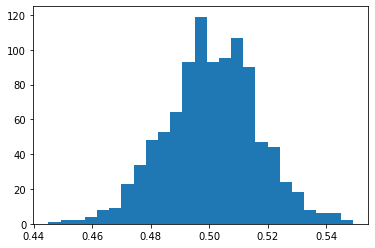

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def tossOnce(p):
  return np.random.binomial(1,p)

def estimateOnce(p,trials = 1000):
  runs = np.zeros(trials)
  for i in range(trials):
    runs[i]= tossOnce(p)
  return sum(runs)/trials

def estimateSeveralTimes(p, reps = 1000, trialPerRep = 1000):
  estimateVals = np.zeros(reps)
  for i in range(reps):
    estimateVals[i] = estimateOnce(p,trialPerRep)
  return estimateVals

# two coins with same bias
pc = 0.5
pd = 0.5

# let us see how estimation works on them
cest = estimateSeveralTimes(pc)


plt.hist(cest,bins=25)
print(np.average(cest))




Estimate for the other coin

0.50016


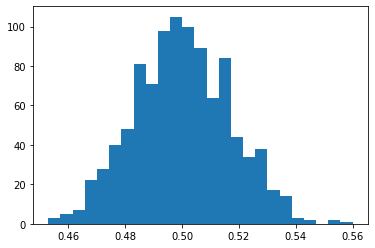

In [ ]:
dest = estimateSeveralTimes(pd)
plt.hist(dest,bins=25)
print(np.average(dest))

Now let us simulate the validation situation by selecting **one** of the two coins based on **performance**

0.490745


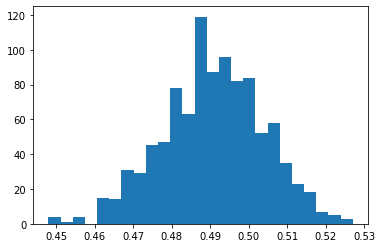

In [ ]:
def chooseBest(pc,pd,reps = 1000, trialPerRep = 1000):
  bestCoin = np.zeros(reps)
  for i in range(reps):
    coinC = estimateOnce(pc, trialPerRep)
    coinD = estimateOnce(pd, trialPerRep)
    if coinC < coinD:
      bestCoin[i] = coinC
    else:
      bestCoin[i] = coinD
  return bestCoin

valCoin = chooseBest(pc,pd)
plt.hist(valCoin,bins=25)
print(np.average(valCoin))

Study the role of
1.   Reps
2.   trialsPerRep
